In [6]:
# Importing Required Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Collect data

data_dir = 'gtsrb-german-traffic-sign'
train_path = 'gtsrb-german-traffic-sign/Train'


# Resizing the images to 30x30x3

height = 30
width = 30
channels = 3

In [8]:
data = []
labels = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [9]:
# Preparing data and labels

for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    
    for a in images:
       
            image = Image.open(path + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
   
    
data = np.array(data)      
labels = np.array(labels)           

In [10]:
print(data.shape,labels.shape)

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
Y_train=tf.keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
Y_test=tf.keras.utils.to_categorical(Y_test,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


In [13]:
# Building model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [14]:
# Compiling model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Augmenting the data to get high accuracy

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")


In [16]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test) )



Epoch 1/15
981/981 [==============================] - 115s 118ms/step - loss: 1.8198 - accuracy: 0.4666 - val_loss: 0.2788 - val_accuracy: 0.9302
Epoch 2/15
981/981 [==============================] - 107s 109ms/step - loss: 0.5595 - accuracy: 0.8230 - val_loss: 0.0781 - val_accuracy: 0.9851
Epoch 3/15
981/981 [==============================] - 88s 90ms/step - loss: 0.3242 - accuracy: 0.8958 - val_loss: 0.0462 - val_accuracy: 0.9848
Epoch 4/15
981/981 [==============================] - 87s 88ms/step - loss: 0.2392 - accuracy: 0.9261 - val_loss: 0.0416 - val_accuracy: 0.9875
Epoch 5/15
981/981 [==============================] - 89s 90ms/step - loss: 0.1959 - accuracy: 0.9389 - val_loss: 0.0153 - val_accuracy: 0.9960
Epoch 6/15
981/981 [==============================] - 94s 96ms/step - loss: 0.1533 - accuracy: 0.9526 - val_loss: 0.0136 - val_accuracy: 0.9973
Epoch 7/15
981/981 [==============================] - 96s 98ms/step - loss: 0.1396 - accuracy: 0.9580 - val_loss: 0.0111 - val_accur

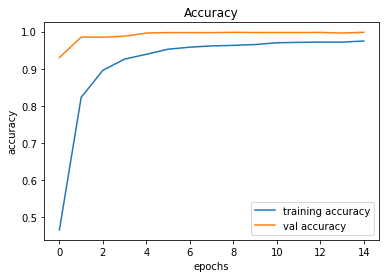

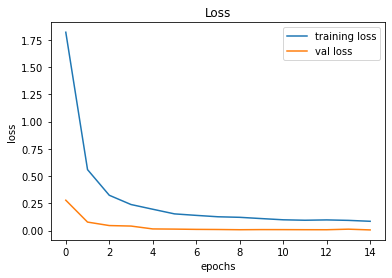

In [17]:
# plotting graphs for accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
# preparing test data

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
images = test["Path"].values

data=[]

for a in images:
        
            image = Image.open(data_dir + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            data.append(image)
            

In [19]:
X_pred = np.array(data)
X_pred = X_pred/255

In [24]:
# Predicting

pred = model.predict_classes(X_pred)

In [26]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  97.55344418052256
